In [4]:
import os
import subprocess
import time
from datetime import datetime
import pandas as pd

sentinel_ASF_products_urls = [
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20240503T154102_20240503T154127_053709_068641_952F.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20240504T034434_20240504T034459_053716_06868A_1FEE.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20240515T154102_20240515T154127_053884_068C8C_2024.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20240516T034433_20240516T034458_053891_068CCC_19DD.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20240527T154102_20240527T154127_054059_0692A2_DF93.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20240528T034434_20240528T034459_054066_0692E4_E9D2.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230427T154057_20230427T154122_048284_05CE71_87D9.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230428T034428_20230428T034453_048291_05CEB1_527A.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230522T034430_20230522T034455_048641_05D9AE_4C24.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230509T154057_20230509T154122_048459_05D442_3CB6.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230510T034429_20230510T034454_048466_05D480_D2F1.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230521T154058_20230521T154123_048634_05D970_718E.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230602T154059_20230602T154124_048809_05DEA1_D36D.zip",
    "https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_IW_GRDH_1SDV_20230603T034430_20230603T034455_048816_05DEDF_69FD.zip"]


Processing file 1/14: S1A_IW_GRDH_1SDV_20240503T154102_20240503T154127_053709_068641_952F.zip

Output location: ../data/raw/sentinel/S1A_IW_GRDH_1SDV_20240503T154102_20240503T154127_053709_068641_952F.zip
 > Reusing previous cookie jar.
 > 'Temporary' Redirect download @ Remote archive:
 > https://dy4owt9f80bz7.cloudfront.net/s3-06b3213905ebfa9144871d6c7f9306f0/asf-ngap2w-p-s1-grd-7d1b4348.s3.us-west-2.amazonaws.com/S1A_IW_GRDH_1SDV_20240503T154102_20240503T154127_053709_068641_952F.zip?A-userid=oettamski&Expires=1745614249&Signature=DGL5qpW7txQO7n5BoTujWZdT4Znjsbi~~POBtmhB~v8SKcTQUD9DeZuCc8ZbBUMgfgEeSOJ4LTcAykpTkCXYEgsFDvOYXA0Ddt-T7X6A1VbJ0INO2d6r6vkek6LOpsk7mwb60BCoVtA8c4Bpi96Xw3qPf-6cjR~vU0R907-F7lcsSiGVF24wHmbI2I-C-gU6waDSljIyUyirhAcv4A7waY-o3NMoVkyH7cwyTdV6vuiCjFD1iQj-Ts7Wq-nCtpJtQ78WPpiIs-k1qC~H2xpAs5~jz4rJSEAhKV7ssJyBmUI9Ba01O2redh8H4J14MlzzPFOkK6TnQxtWZ0jmZY7rZQ__&Key-Pair-Id=K2A41RM3Q5R28W
 > Downloaded 1739577125 of 1739577125 bytes (100.00%)
Successfully downloaded 17395771

| # | Filename | Orbit | Date | Success | Processing Time |
|---|---------|-------|------|---------|----------------|
| 1 | S1A_IW_GRDH_1SDV_20240503T154102_20240503T154127_053709_068641_952F.zip | ASC | 20240503 | ✅ | 0 days 00:02:42.117557 |
| 2 | S1A_IW_GRDH_1SDV_20240504T034434_20240504T034459_053716_06868A_1FEE.zip | DESC | 20240504 | ✅ | 0 days 00:01:52.996702 |
| 3 | S1A_IW_GRDH_1SDV_20240515T154102_20240515T154127_053884_068C8C_2024.zip | ASC | 20240515 | ✅ | 0 days 00:03:33.805354 |
| 4 | S1A_IW_GRDH_1SDV_20240516T034433_20240516T034458_053891_068CCC_19DD.zip | DESC | 20240516 | ✅ | 0 days 00:02:37.401252 |
| 5 | S1A_IW_GRDH_1SDV_20240527T154102_20240527T154127_054059_0692A2_DF93.zip | ASC | 20240527 | ✅ | 0 days 00:01:51.642504 |
| 6 | S1A_IW_GRDH_1SDV_20240528T034434_20240528T034459_054066_0692E4_E9D2.zip | DESC | 20240528 | ✅ | 0 days 00:02:16.003036 |
| 7 | S1A_IW_GRDH_1SDV_20230427T154057_20230427T154122_048284_05CE71_87D9.zip | ASC | 20230427 | ✅ | 0 days 00:02:03.515145 |
| 8 | S1A_IW_GRDH_1SDV_20230428T034428_20230428T034453_048291_05CEB1_527A.zip | DESC | 20230428 | ✅ | 0 days 00:01:09.663129 |
| 9 | S1A_IW_GRDH_1SDV_20230522T034430_20230522T034455_048641_05D9AE_4C24.zip | DESC | 20230522 | ✅ | 0 days 00:01:22.280892 |
| 10 | S1A_IW_GRDH_1SDV_20230509T154057_20230509T154122_048459_05D442_3CB6.zip | ASC | 20230509 | ✅ | 0 days 00:01:23.893975 |
| 11 | S1A_IW_GRDH_1SDV_20230510T034429_20230510T034454_048466_05D480_D2F1.zip | DESC | 20230510 | ✅ | 0 days 00:01:21.183100 |
| 12 | S1A_IW_GRDH_1SDV_20230521T154058_20230521T154123_048634_05D970_718E.zip | ASC | 20230521 | ✅ | 0 days 00:01:35.161424 |
| 13 | S1A_IW_GRDH_1SDV_20230602T154059_20230602T154124_048809_05DEA1_D36D.zip | ASC | 20230602 | ✅ | 0 days 00:02:08.312339 |
| 14 | S1A_IW_GRDH_1SDV_20230603T034430_20230603T034455_048816_05DEDF_69FD.zip | DESC | 20230603 | ✅ | 0 days 00:01:40.575678 |


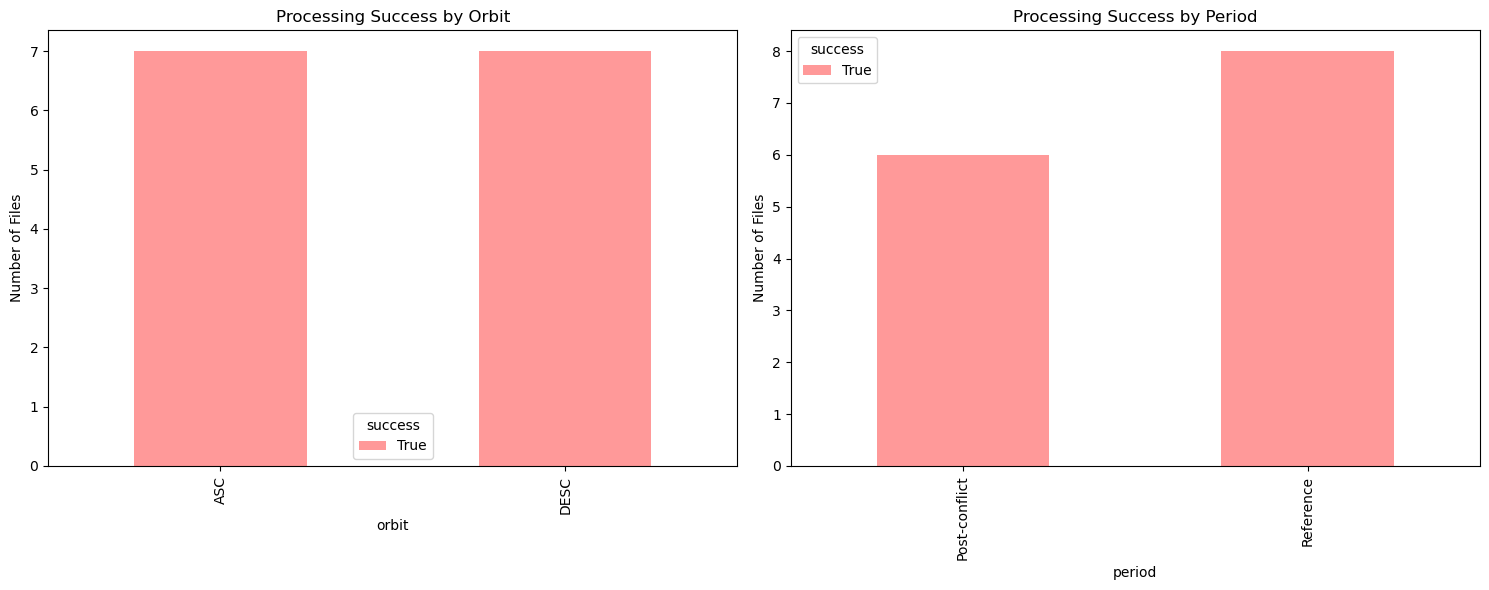

In [5]:
# Define paths
aoi_path = "../utils/AOI_bboxes/aoi_shifa.geojson"
output_dir = "../data/preprocessed/sentinel"
snap_gpt_path = "/Applications/esa-snap/bin/gpt" 

# Create a dictionary to track processing results
results = []

# Process each URL
for i, url in enumerate(sentinel_ASF_products_urls):
    # Extract filename from URL
    filename = os.path.basename(url)
    
    # Print progress information
    print(f"\n{'='*80}")
    print(f"Processing file {i+1}/{len(sentinel_ASF_products_urls)}: {filename}")
    print(f"{'='*80}\n")
    
    # Track start time
    start_time = datetime.now()
    
    # Build command for download and processing
    cmd = [
        "python", 
        "download_process_single_sentinel_file.py", 
        url, 
        aoi_path, 
        output_dir, 
        "--snap_gpt_path", 
        snap_gpt_path
    ]
    
    # Run the command
    try:
        # Execute download and processing
        process = subprocess.run(cmd, capture_output=False, text=True)
        success = process.returncode == 0
        end_time = datetime.now()
        processing_time = end_time - start_time
        
        # Record result
        results.append({
            'filename': filename,
            'url': url,
            'success': success,
            'processing_time': processing_time,
            'date': filename.split('_')[5][:8],  # Extract date YYYYMMDD
            'orbit': 'ASC' if 'T15' in filename else 'DESC'  # Determine orbit from time
        })
        
        # Store intermediate results in case of interruption
        pd.DataFrame(results).to_csv('../data/processing_results.csv', index=False)
        
        print(f"\nProcessed {filename} in {processing_time}")
        print(f"Status: {'SUCCESS' if success else 'FAILED'}")
        
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")
        results.append({
            'filename': filename,
            'url': url,
            'success': False,
            'processing_time': datetime.now() - start_time,
            'date': filename.split('_')[5][:8],
            'orbit': 'ASC' if 'T15' in filename else 'DESC',
            'error': str(e)
        })
        
    # Optional: Add a short delay between processing files
    time.sleep(1)

# Create a results DataFrame
results_df = pd.DataFrame(results)

# Calculate summary statistics
total_success = results_df['success'].sum()
total_failed = len(results_df) - total_success
total_time = results_df['processing_time'].sum()
avg_time = results_df['processing_time'].mean()

# Print summary
print("\n" + "="*80)
print("PROCESSING SUMMARY")
print("="*80)
print(f"Total files processed: {len(results_df)}")
print(f"Successfully processed: {total_success}")
print(f"Failed: {total_failed}")
print(f"Total processing time: {total_time}")
print(f"Average processing time: {avg_time}")
print("="*80)

# Save results to CSV
results_df.to_csv('../data/processing_results.csv', index=False)
print(f"Results saved to ../data/processing_results.csv")

# Create a Markdown-friendly table of results
from IPython.display import display, Markdown

# Format the results into a Markdown table
md_table = "| # | Filename | Orbit | Date | Success | Processing Time |\n"
md_table += "|---|---------|-------|------|---------|----------------|\n"

for i, row in results_df.iterrows():
    md_table += f"| {i+1} | {row['filename']} | {row['orbit']} | {row['date']} | {'✅' if row['success'] else '❌'} | {row['processing_time']} |\n"
    
display(Markdown(md_table))

# Plot success rate by orbit and time period
if len(results_df) > 0:
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        # Add reference/post classification based on date
        results_df['period'] = results_df['date'].apply(
            lambda x: 'Reference' if x < '20231007' else 'Post-conflict'
        )
        
        # Create a figure with summary plots
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Success by orbit
        orbit_success = results_df.groupby(['orbit', 'success']).size().unstack(fill_value=0)
        orbit_success.plot(kind='bar', stacked=True, ax=axes[0], 
                          color=['#ff9999', '#66b3ff'])
        axes[0].set_title('Processing Success by Orbit')
        axes[0].set_ylabel('Number of Files')
        
        # Success by period
        period_success = results_df.groupby(['period', 'success']).size().unstack(fill_value=0)
        period_success.plot(kind='bar', stacked=True, ax=axes[1],
                           color=['#ff9999', '#66b3ff'])
        axes[1].set_title('Processing Success by Period')
        axes[1].set_ylabel('Number of Files')
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error creating plots: {str(e)}")